## Building Makemore

In [81]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
words = open('names.txt', 'r').read().splitlines()

In [83]:

N = torch.ones((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [84]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [85]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = stoi[ch1]
        index2 = stoi[ch2]
        N[index1, index2] += 1


(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

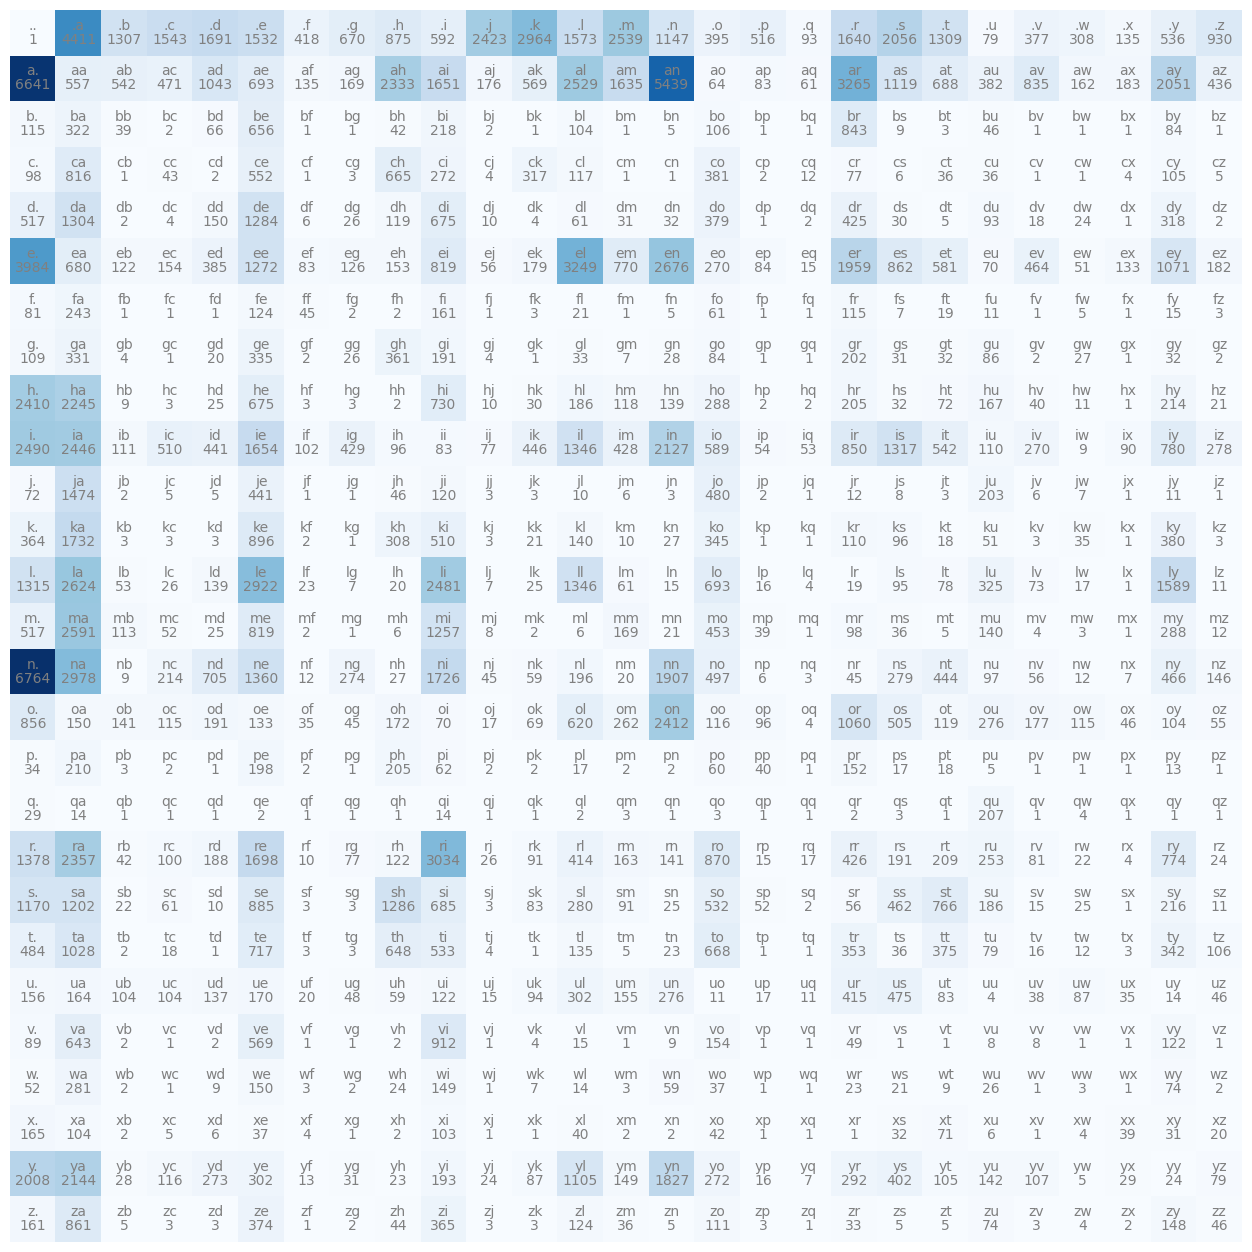

In [86]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")

plt.axis('off')

In [87]:
P = N.float()
P /= P.sum(dim=1, keepdim=True)

In [88]:
ix = 0
g = torch.Generator().manual_seed(423)
stri = ""

for i in range(5):
    stri = ""
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if(ix == 0):
            break
        stri += itos[ix]
    
    print(stri)

kat
rmamaynldmesth
ryasallev
teyendeamobirelinah
sen


In [89]:
log_likelihood = 0.0
n = 0

for w in ["yvesx"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = stoi[ch1]
        index2 = stoi[ch2]
        prob = P[index1, index2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2} - {prob} - {-logprob}")

print(f"{-log_likelihood/n}")


.y - 0.016718652099370956 - 4.091230392456055
yv - 0.010915026068687439 - 4.517614841461182
ve - 0.2188461571931839 - 1.5193862915039062
es - 0.04215158894658089 - 3.166482925415039
sx - 0.00012295585474930704 - 9.003684997558594
x. - 0.22790054976940155 - 1.4788459539413452
3.962874174118042


In [90]:
# create training set of bigrams

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = stoi[ch1]
        index2 = stoi[ch2]
        xs.append(index1)
        ys.append(index2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


xenc = F.one_hot(xs, num_classes=27).float()
nelements = xenc.shape[0]
print(nelements)


228146


In [91]:
epochs = 100
lr = 100

W = torch.randn((27, 27), requires_grad=True)

for e in range(epochs):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(nelements), ys].log().mean() + 0.01*(W**2).mean()

    W.grad = None
    loss.backward()
    W.data -= (W.grad * lr)

    print(f"{e} - {loss.item() :.3f}")

0 - 3.722
1 - 3.108
2 - 2.925
3 - 2.799
4 - 2.734
5 - 2.698
6 - 2.686
7 - 2.646
8 - 2.630
9 - 2.614
10 - 2.618
11 - 2.592
12 - 2.587
13 - 2.579
14 - 2.589
15 - 2.566
16 - 2.565
17 - 2.561
18 - 2.572
19 - 2.552
20 - 2.551
21 - 2.549
22 - 2.562
23 - 2.542
24 - 2.542
25 - 2.541
26 - 2.555
27 - 2.535
28 - 2.535
29 - 2.535
30 - 2.550
31 - 2.529
32 - 2.530
33 - 2.531
34 - 2.546
35 - 2.525
36 - 2.526
37 - 2.527
38 - 2.543
39 - 2.522
40 - 2.523
41 - 2.525
42 - 2.540
43 - 2.520
44 - 2.520
45 - 2.522
46 - 2.538
47 - 2.518
48 - 2.518
49 - 2.521
50 - 2.537
51 - 2.516
52 - 2.517
53 - 2.519
54 - 2.535
55 - 2.515
56 - 2.516
57 - 2.518
58 - 2.534
59 - 2.514
60 - 2.514
61 - 2.517
62 - 2.533
63 - 2.513
64 - 2.514
65 - 2.516
66 - 2.533
67 - 2.512
68 - 2.513
69 - 2.516
70 - 2.532
71 - 2.512
72 - 2.512
73 - 2.515
74 - 2.531
75 - 2.511
76 - 2.512
77 - 2.515
78 - 2.531
79 - 2.511
80 - 2.511
81 - 2.514
82 - 2.530
83 - 2.510
84 - 2.511
85 - 2.514
86 - 2.530
87 - 2.510
88 - 2.510
89 - 2.513
90 - 2.530
91 - 2.51

In [92]:
ix = 0
g = torch.Generator().manual_seed(423)

for i in range(5):
    stri = ""
    while True:
        p = torch.tensor([ix])
        xenc = F.one_hot(p, num_classes=27).float()

        logits = xenc @ W
        counts = logits.exp()
        probs = counts/counts.sum(1, keepdims=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True).item()
        
        if(ix == 0):
            break
        stri += itos[ix]
    
    print(stri)

ennnn
l
man
jalum
ntelvioahajmavylin


## Video 3 - Building makemore Part 2: MLP 

In [93]:
words = open('names.txt', 'r').read().splitlines()
len(words)

32033

In [94]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [95]:
block_size = 3
X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + ".":
        index = stoi[ch]
        X.append(context)
        Y.append(index)
        context = context[1:] + [index]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [96]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            index = stoi[ch]
            X.append(context)
            Y.append(index)
            context = context[1:] + [index]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

In [97]:
C = torch.randn((27, 2))
C

tensor([[ 1.3968,  1.7684],
        [ 0.6375,  0.1970],
        [ 0.1594, -2.2898],
        [ 2.4172,  0.5855],
        [ 0.0423, -2.8935],
        [ 0.4081, -0.4161],
        [-0.5726,  1.4983],
        [-1.8956,  1.0778],
        [ 0.3504,  0.8891],
        [ 0.7672, -0.2266],
        [-0.2349,  1.3238],
        [ 0.6605, -0.1987],
        [-0.4766, -0.3669],
        [-0.6911, -0.8733],
        [ 0.1877, -0.5314],
        [ 0.5801, -0.1569],
        [-1.9790, -0.3343],
        [-1.4773,  1.0586],
        [-0.0559, -0.2828],
        [-0.6762,  0.0763],
        [-1.5275,  1.7302],
        [ 1.8356, -1.6921],
        [-0.0057,  0.3561],
        [ 1.0884,  0.3421],
        [ 0.9336,  1.1180],
        [-0.3588,  0.6260],
        [-1.5699, -1.3288]])

In [98]:
emb = C[X]

In [99]:
emb.shape

torch.Size([228146, 3, 2])

In [100]:
w1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [101]:
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)

In [102]:
w2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [103]:
logits = h @ w2 + b2
logits

tensor([[ -4.6925,  -1.8111,   3.1151,  ...,  -2.1451,   3.9668,  -4.1968],
        [ -4.4304,  -2.0947,   2.5999,  ...,   1.4438,   4.6025,  -6.0364],
        [-11.1168,  -1.9321,  11.9667,  ...,   8.6009,   3.9503, -18.6205],
        ...,
        [ -6.1771,  -8.7486,   0.4216,  ...,  -6.6662,  -0.5728,  12.4598],
        [  4.2657,  -9.0966,   2.1801,  ...,  -2.9680,   9.7933,   3.8469],
        [ -8.4830,  -1.7905,   8.0489,  ..., -15.2327,  -5.1955,  12.8611]])

In [104]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[1.0383e-08, 1.8524e-07, 2.5536e-05,  ..., 1.3263e-07, 5.9843e-05,
         1.7046e-08],
        [1.7537e-08, 1.8129e-07, 1.9825e-05,  ..., 6.2390e-06, 1.4687e-04,
         3.5198e-09],
        [8.5714e-11, 8.3540e-07, 9.0795e-01,  ..., 3.1357e-02, 2.9963e-04,
         4.7234e-14],
        ...,
        [4.4195e-10, 3.3777e-11, 3.2448e-07,  ..., 2.7101e-10, 1.2003e-07,
         5.4865e-02],
        [1.1211e-07, 1.7640e-13, 1.3928e-08,  ..., 8.0930e-11, 2.8202e-05,
         7.3754e-08],
        [3.7852e-10, 3.0519e-07, 5.7251e-03,  ..., 4.4330e-13, 1.0134e-08,
         7.0422e-01]])

In [105]:
embedding_size = 10
chars_used = 3
hidden_size = 200

g = torch.Generator().manual_seed(42)
C = torch.randn((27, embedding_size), generator=g)
w1 = torch.randn(embedding_size*chars_used, hidden_size, generator=g)
b1 = torch.randn(hidden_size, generator=g)
w2 = torch.randn(hidden_size, 27, generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]

In [106]:
sum(p.nelement() for p in parameters)

11897

In [107]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [108]:
for p in parameters:
    p.requires_grad = True

lr = 0.01
epochs = 50000
lossi = []
stepi = []
lri = []
minibatch_size = 32

for i in range(epochs):
    ix = torch.randint(0, Xtr.shape[0], (minibatch_size,))
    
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, embedding_size*chars_used) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, torch.tensor(Ytr[ix])) 
    
    for p in parameters:
        p.grad = None
    loss.backward()

    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())



/var/folders/pf/3syxcjk520sggxd851gwc63h0000gn/T/ipykernel_24990/3097207987.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = F.cross_entropy(logits, torch.tensor(Ytr[ix]))


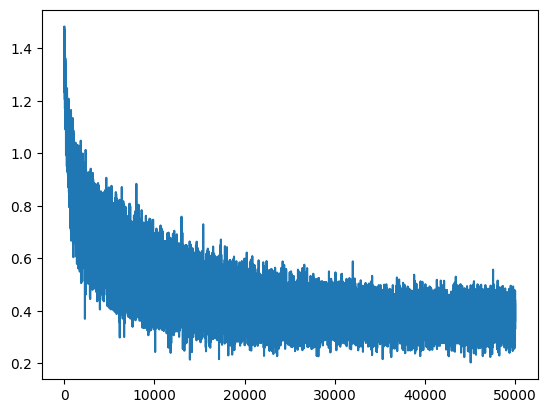

In [109]:
plt.plot(stepi, lossi)

In [110]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, embedding_size*chars_used) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, torch.tensor(Ydev))

print(loss.item())


2.3704254627227783


/var/folders/pf/3syxcjk520sggxd851gwc63h0000gn/T/ipykernel_24990/1251993220.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = F.cross_entropy(logits, torch.tensor(Ydev))


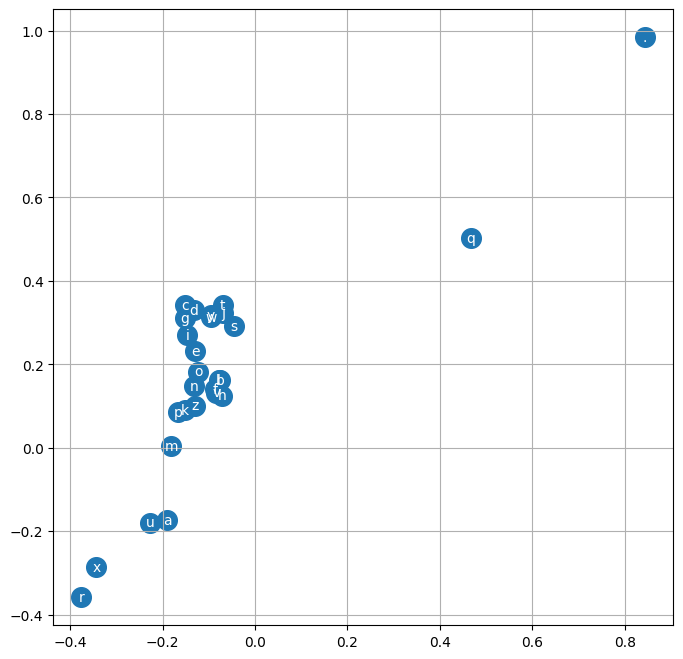

In [111]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [112]:
#sampling 

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ w1 + b1)
        logits = h @ w2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if(ix == 0):
            break
    print(''.join(itos[i] for i in out))

jacyniny.
hatane.
dor.
aletilen.
addah.
jama.
coabredileytsa.
khriskis.
samiy.
plyn.
eramwor.
kevek.
lela.
abriesson.
rien.
karmie.
cer.
minse.
jalle.
wite.


In [113]:
emb.view(1, -1)

tensor([[-0.1463,  0.2697, -0.2773, -0.0527, -0.0025,  0.1188, -0.4256,  0.3096,
         -0.2640,  0.1616, -0.0701,  0.3411, -0.2433, -0.1194, -0.0089,  0.1838,
         -0.1303,  0.2603, -0.2264,  0.1671, -0.1293,  0.2319, -0.2414, -0.0034,
         -0.0499,  0.1180, -0.4236,  0.2697, -0.1972,  0.2053]],
       grad_fn=<ViewBackward0>)

## Video 4

### Resumen de vid 3

In [177]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
#read words
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [179]:
len(words)

32033

In [180]:
# build vocabulary
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [181]:
block_size = 3

def build_dataset(words):
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            index = stoi[ch]
            X.append(context)
            Y.append(index)
            context = context[1:] + [index]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

#split on train dev test
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

In [184]:
#MLP
embedding_size = 10
hidden_size = 200

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, embedding_size), generator=g)
w1 = torch.randn((embedding_size*block_size, hidden_size), generator=g) * (5/3) / ((embedding_size*block_size)**0.5)
#b1 = torch.randn(hidden_size, generator=g) * 0.001
w2 = torch.randn((hidden_size, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0

bngain = torch.ones((1, hidden_size))
bnbias = torch.zeros((1, hidden_size))

bnmean_running = torch.zeros((1, hidden_size))
bnstd_running = torch.ones((1, hidden_size))

parameters = [C, w1, w2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

12097


In [ ]:
#training
epochs = 200000
minibatch_size = 32
lossi = []

for i in range(epochs):
    ix = torch.randint(0, Xtr.shape[0], (minibatch_size,), generator=g)

    Xb = Xtr[ix]
    Yb = Ytr[ix]
    
    emb = C[Xb]
    hpreact = emb.view(emb.shape[0], -1) @ w1
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.std(0, keepdim=True)
    hpreact = bngain * (hpreact - bnmeani)/bnstdi + bnbias

    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi
    
    h = torch.tanh(hpreact)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Yb) 
    
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 0.1 if i<100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    if i% 10000 == 0:
        print(f'{i:7d}/{epochs:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    

    #break



      0/ 200000: 3.3239
  10000/ 200000: 2.0322
  20000/ 200000: 2.5675
  30000/ 200000: 2.0125
  40000/ 200000: 2.2446
  50000/ 200000: 1.8897
  60000/ 200000: 2.0785
  70000/ 200000: 2.3681
  80000/ 200000: 2.2918
  90000/ 200000: 2.0238
 100000/ 200000: 2.3673


### Continue

In [ ]:
plt.hist(h.view(-1).tolist(), 50)

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation="nearest")

In [ ]:
embedding_size*block_size

In [ ]:
plt.plot(lossi)

In [ ]:
#calibrating batch norm at the end of training

with torch.no_grad():
    emb = C[Xtr]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ w1
    bnmean = hpreact.mean(0, keepdim=True)
    bnstd = hpreact.std(0, keepdim=True)

In [ ]:
bnmean - bnmean_running, bnstd - bnstd_running

In [ ]:
@torch.no_grad
def  split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xtest, Ytest),
    }[split]
    emb = C[x]

    hpreact = emb.view(emb.shape[0], -1) @ w1
    hpreact = bngain * (hpreact - bnmean_running)/bnstd_running + bnbias


    h = torch.tanh(hpreact)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, torch.tensor(y))
    print(split, loss.item())

split_loss('train')
split_loss('val')

In [ ]:
#sampling 

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ w1 + b1)
        logits = h @ w2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if(ix == 0):
            break
    print(''.join(itos[i] for i in out))

In [ ]:
logits = torch.tensor([0.0, 0.0, 0.0, 0.0])
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss